- Load data to df
- Plot the data
- Train model
- Predit with training data
- Predict with Test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
def plot(x_train,y_train):

    plt.scatter(x_train, y_train, label='Training Data')
    ##plt.plot(x_test, y_test, label='Test Data')

    plt.xlabel("x")
    plt.ylabel("y")

    plt.title("Training Data")
    plt.legend()

    plt.show()
    

## Load Data to DF

In [2]:
filename = 'feature_and_target.csv'
df = pd.read_csv(filename)
df_cleaned = df.dropna()

In [4]:
import numpy as np
import pandas as pd

def add_noise_to_column(df, column_name, noise_level):
    """
    Adds noise to a specific column in a DataFrame.
    
    Parameters:
        df (DataFrame): The original DataFrame.
        column_name (str): Name of the column to add noise to.
        noise_level (float): The percentage of values to flip (0 to 1).
        
    Returns:
        DataFrame: DataFrame with added noise to the specified column.
    """
    num_samples = len(df)
    num_to_flip = int(noise_level * num_samples)
    
    # Randomly choose indices to flip
    flip_indices = np.random.choice(num_samples, num_to_flip, replace=False)
    
    # Flip the values at selected indices
    noisy_column = df[column_name].copy()
    noisy_column.iloc[flip_indices] = 1 - noisy_column.iloc[flip_indices]
    
    # Update the DataFrame with the noisy column
    df[column_name + '_noisy'] = noisy_column
    
    return df

# Example DataFrame
# data = {'A': [0, 1, 0, 1, 0, 1, 0, 1]}
# df = pd.DataFrame(data)

# Example usage:
noise_level = 0.2  # Example noise level (20% of values to flip)
column_name = 'risky'  # Name of the column to add noise to

noisy_df = add_noise_to_column(df_cleaned, column_name, noise_level)
print("Original DataFrame:")
print(df)
print("\nDataFrame with Noisy Column:")
print(noisy_df)

Original DataFrame:
     Volatility  risky
0     37.515407      0
1     26.781608      0
2     31.403969      0
3     32.166698      0
4     16.822405      0
..          ...    ...
500   20.899655      0
501   33.632124      0
502   20.436762      0
503   27.742614      0
504   29.626430      0

[505 rows x 2 columns]

DataFrame with Noisy Column:
     Volatility  risky  risky_noisy
0     37.515407      0            0
1     26.781608      0            0
2     31.403969      0            0
3     32.166698      0            0
4     16.822405      0            1
..          ...    ...          ...
500   20.899655      0            1
501   33.632124      0            0
502   20.436762      0            0
503   27.742614      0            1
504   29.626430      0            0

[495 rows x 3 columns]


C:\Users\andre\AppData\Local\Temp\ipykernel_20816\3618548960.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_noisy'] = noisy_column


## Plot data

[(0, 37.51540703), (1, 26.78160795), (2, 31.40396867), (3, 32.16669784), (4, 16.82240451), (5, 22.02970084), (6, 20.5155356), (7, 23.56396889), (8, 31.6458112), (9, 23.75830435), (10, 19.33819856), (11, 28.42687141), (12, 22.65346312), (13, 19.7352808), (14, 19.87622679), (15, 28.55797228), (16, 29.15989309), (17, 18.68640043), (18, 31.11171485), (19, 20.69182207), (20, 21.60304626), (21, 20.54447016), (22, 15.41757085), (23, 30.42347821), (24, 34.96623656), (25, 30.27132173), (26, 30.96672252), (27, 20.38601888), (28, 20.80875581), (29, 34.5756059), (30, 27.14628105), (31, 55.48018169), (32, 20.70021963), (33, 28.38518996), (34, 26.91970102), (35, 22.8940519), (36, 20.25290716), (37, 32.7257704), (38, 34.99131249), (39, 19.6645789), (40, 24.69409112), (41, 18.78005786), (42, 25.88206514), (43, 41.93841215), (44, 36.37602239), (45, 21.80460044), (46, 22.11649091), (48, 19.56850984), (49, 38.31415253), (50, 27.48583773), (51, 19.58716172), (52, 40.08281626), (53, 21.30213623), (54, 17.2

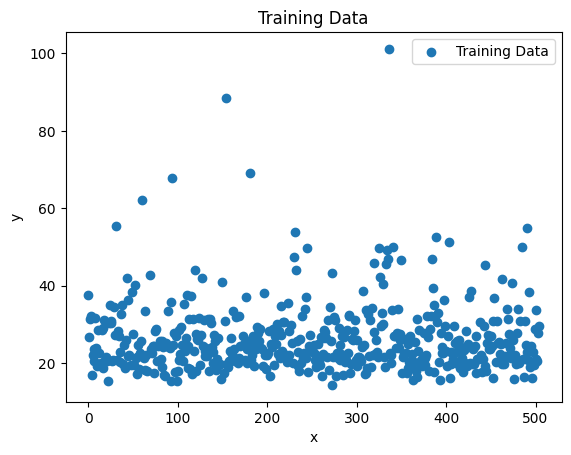

In [5]:
x_plot = df_cleaned.index.to_numpy()
y_plot = df_cleaned['Volatility'].values

combined_x = [(index, value) for index, value in zip(x_plot, y_plot)]


print(combined_x)



plot(x_plot, y_plot)

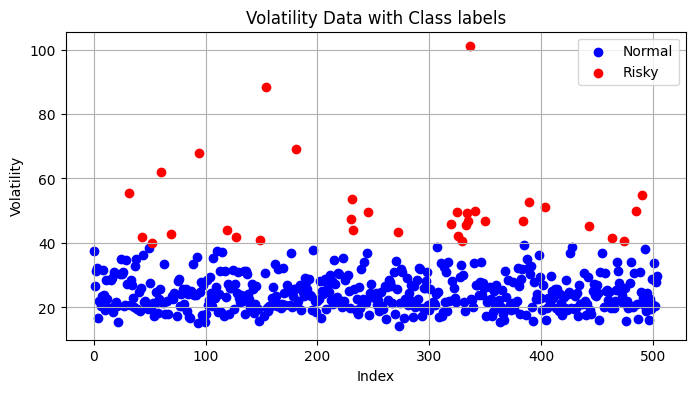

In [3]:
normal_data = df_cleaned[df_cleaned['risky'] == 0]
anomaly_data = df_cleaned[df_cleaned['risky'] == 1]

plt.figure(figsize=(8, 4))
plt.scatter(normal_data.index, normal_data['Volatility'], color='b', label='Normal')
plt.scatter(anomaly_data.index, anomaly_data['Volatility'], color='r', label='Risky')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.title('Volatility Data with Class labels')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# How should one collect data for classification?
# Add noise
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x = df_cleaned['Volatility'].values 
y = df_cleaned['risky'].values



print (x)


[ 37.51540703  26.78160795  31.40396867  32.16669784  16.82240451
  22.02970084  20.5155356   23.56396889  31.6458112   23.75830435
  19.33819856  28.42687141  22.65346312  19.7352808   19.87622679
  28.55797228  29.15989309  18.68640043  31.11171485  20.69182207
  21.60304626  20.54447016  15.41757085  30.42347821  34.96623656
  30.27132173  30.96672252  20.38601888  20.80875581  34.5756059
  27.14628105  55.48018169  20.70021963  28.38518996  26.91970102
  22.8940519   20.25290716  32.7257704   34.99131249  19.6645789
  24.69409112  18.78005786  25.88206514  41.93841215  36.37602239
  21.80460044  22.11649091  19.56850984  38.31415253  27.48583773
  19.58716172  40.08281626  21.30213623  17.22804873  21.47599545
  24.69068667  18.3956695   22.54838296  25.71853812  62.13576327
  21.73909514  21.4135479   33.39080956  18.08025275  22.13754785
  17.96306823  42.70476156  23.49530307  22.58142116  24.51550948
  24.27984096  17.28425047  28.17156384  28.80872934  20.42715896
  24.2859078

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

In [ ]:
plot_decision_regions(X=X_train_01_subset,
                       y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
df_cleaned.shape

(495, 2)

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.1)

In [10]:
print(x_test.shape, y_test.shape)

(50,) (50,)


In [6]:
x_fit_train = x_train.reshape(-1,1)
x_fit_test = x_test.reshape(-1,1)

model = LogisticRegression()
model.fit(x_fit_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(x_fit_test)
print(model.score(x_fit_test, y_test))
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("F1 Score:", f1)

1.0
Accuracy: 1.0
Precision: 1.0
Sensitivity (Recall): 1.0
F1 Score: 1.0


In [27]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X1, X2, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X1.min() - 1, X1.max() + 1
    x2_min, x2_max = X2.min() - 1, X2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(X1.reshape(-1,1))
    print(Z.shape)
    print(xx1.shape)
    #Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X1[y == cl, 0],
                     y=X2[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

In [16]:
x1 = df_cleaned.index.to_numpy()
x2 = df_cleaned['Volatility'].values 
y = df_cleaned['risky'].values


(495,)
(4443, 25300)


TypeError: Input z must be 2D, not 1D

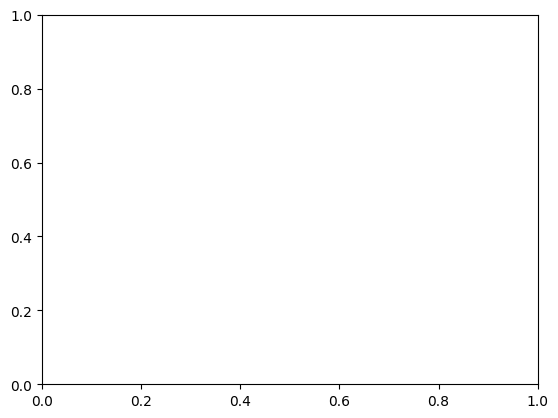

In [28]:
plot_decision_regions(X1=x1, X2=x2,
                       y=y,
                      classifier=model)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
new_x = np.array([1, 93, 53, 88, 66, 88, 15, 81, 76, 46])
new_fit = new_x.reshape(-1,1)
model.predict(new_fit)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

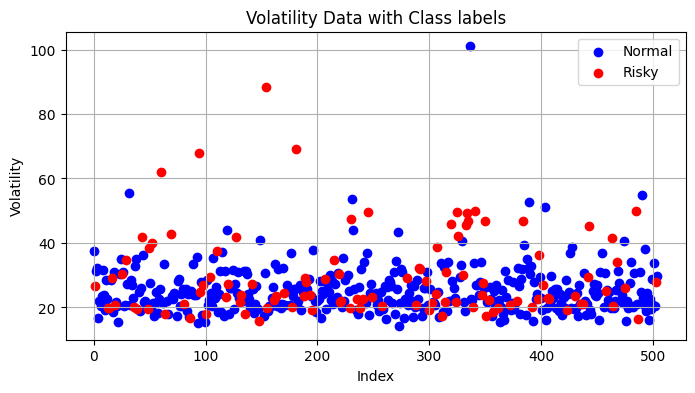

In [32]:
normal_data = noisy_df[noisy_df['risky_noisy'] == 0]
anomaly_data = noisy_df[noisy_df['risky_noisy'] == 1]

plt.figure(figsize=(8, 4))
plt.scatter(normal_data.index, normal_data['Volatility'], color='b', label='Normal')
plt.scatter(anomaly_data.index, anomaly_data['Volatility'], color='r', label='Risky')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.title('Volatility Data with Class labels')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# How should one collect data for classification?
# label based on a probability after 40% and then increase it after that (fast increase)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x = noisy_df['Volatility'].values 
y = noisy_df['risky_noisy'].values



print (x)


[ 37.51540703  26.78160795  31.40396867  32.16669784  16.82240451
  22.02970084  20.5155356   23.56396889  31.6458112   23.75830435
  19.33819856  28.42687141  22.65346312  19.7352808   19.87622679
  28.55797228  29.15989309  18.68640043  31.11171485  20.69182207
  21.60304626  20.54447016  15.41757085  30.42347821  34.96623656
  30.27132173  30.96672252  20.38601888  20.80875581  34.5756059
  27.14628105  55.48018169  20.70021963  28.38518996  26.91970102
  22.8940519   20.25290716  32.7257704   34.99131249  19.6645789
  24.69409112  18.78005786  25.88206514  41.93841215  36.37602239
  21.80460044  22.11649091  19.56850984  38.31415253  27.48583773
  19.58716172  40.08281626  21.30213623  17.22804873  21.47599545
  24.69068667  18.3956695   22.54838296  25.71853812  62.13576327
  21.73909514  21.4135479   33.39080956  18.08025275  22.13754785
  17.96306823  42.70476156  23.49530307  22.58142116  24.51550948
  24.27984096  17.28425047  28.17156384  28.80872934  20.42715896
  24.2859078

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.1)
x_fit_train = x_train.reshape(-1,1)
x_fit_test = x_test.reshape(-1,1)

model = LogisticRegression()
model.fit(x_fit_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_fit_test)
model.score(x_fit_test, y_pred)
print(model.score(x_fit_train, y_train))
print(model.score(x_fit_test, y_test))


new_x = np.array([1, 93, 53, 88, 66, 88, 15, 81, 76, 46])
new_fit = new_x.reshape(-1,1)
y_pred_test=model.predict(new_fit)

print(y_pred_test)

0.7887640449438202
0.7
[0 1 1 1 1 1 0 1 1 0]
